In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import math
from datetime import datetime
np.random.seed(0)

In [23]:
startDate='2019-12-31'
endDate='2020-11-18'
symbols = ['SWI', 'RNG','MSFT']
stockAmount = len(symbols)

In [24]:
df = pd.DataFrame({})
for i in symbols:
    tickerSymbol = i
    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)
    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=startDate, end=endDate)
    tickerDf["day_price"] = (tickerDf["Open"] + tickerDf["Close"]) /2
    tickerDf['previus_day_price'] = tickerDf["day_price"].shift()
    tickerDf['return'] = np.log( tickerDf["day_price"]/tickerDf['previus_day_price'] )
    #print(tickerSymbol, tickerDf)
    dfT = pd.DataFrame({
        tickerSymbol: tickerDf['return']
    })
    df = pd.concat([df, dfT], axis=1)
print(df.head())

                 SWI       RNG      MSFT
Date                                    
2019-12-31       NaN       NaN       NaN
2020-01-02  0.018231  0.024303  0.015556
2020-01-03 -0.013642 -0.005962 -0.007732
2020-01-06 -0.009743  0.017723 -0.002622
2020-01-07  0.001359  0.017612  0.002496


In [25]:
portafolio = np.random.rand(10001,stockAmount)
totals = portafolio.sum(axis=1)

In [26]:
for i in range(len(portafolio)):
    portafolio[i] = portafolio[i] / totals[i]
portafolio[len(portafolio)-1]=[1/3,1/3,1/3]

In [27]:
portafolio
#print(portafolio[len(portafolio)-1])

array([[0.29399155, 0.38311672, 0.32289173],
       [0.33750765, 0.26241723, 0.40007512],
       [0.1908342 , 0.38890714, 0.42025866],
       ...,
       [0.41560265, 0.31530575, 0.2690916 ],
       [0.38313295, 0.32982313, 0.28704392],
       [0.33333333, 0.33333333, 0.33333333]])

In [28]:
dataframe=df.to_numpy()
#print(dataframe[0],dataframe[224])
#print(len(dataframe))


In [29]:
suma0=0
suma1=0
suma2=0
#no hay valores en la primera ni ultima fila
for i in range(len(dataframe)-2):
    suma0=suma0+dataframe[i+1][0]
    suma1=suma1+dataframe[i+1][1]
    suma2=suma2+dataframe[i+1][2]
prom0=suma0/len(dataframe-2)
prom1=suma1/len(dataframe-2)
prom2=suma2/len(dataframe-2)
prom=np.array([[prom0],[prom1],[prom2]])
print(prom)

[[0.0007658 ]
 [0.00251942]
 [0.00143165]]


In [30]:
#Expected Portfolio return
epr=[]
#print(len(portafolio))
for i in range(len(portafolio)):
    epr.append(portafolio[i][0]*prom[0][0]+portafolio[i][1]*prom[1][0]+portafolio[i][2]*prom[2][0])
#print(epr)
#print(len(epr))


In [31]:
#Covariance matrix
dataframen=np.zeros((len(dataframe),3))
cov=[]
for i in range (len(dataframe)-2):
    dataframen[i+1][0]=dataframe[i+1][0]-prom[0][0]
    dataframen[i+1][1]=dataframe[i+1][1]-prom[1][0]
    dataframen[i+1][2]=dataframe[i+1][2]-prom[2][0]
transpuesta=np.transpose(dataframen)
#print(dataframen)
#print(transpuesta)
#print(transpuesta[0][1])
cov=np.zeros((3,3))
#print(cov)
for i in range(len(transpuesta)):
    cov[0][0]=cov[0][0]+transpuesta[i][0]*dataframen[i][0]
    cov[0][1]=cov[0][1]+transpuesta[i][0]*dataframen[i][1]
    cov[0][2]=cov[0][2]+transpuesta[i][0]*dataframen[i][2]
    cov[1][0]=cov[1][0]+transpuesta[i][1]*dataframen[i][0]
    cov[1][1]=cov[1][1]+transpuesta[i][1]*dataframen[i][1]
    cov[1][2]=cov[1][2]+transpuesta[i][1]*dataframen[i][2]
    cov[2][0]=cov[2][0]+transpuesta[i][2]*dataframen[i][0]
    cov[2][1]=cov[2][1]+transpuesta[i][2]*dataframen[i][1]
    cov[2][2]=cov[2][2]+transpuesta[i][2]*dataframen[i][2]
print(cov)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.76961312e-04  3.54732917e-04  1.78247316e-04]
 [-1.61069512e-05 -1.07037797e-04 -3.58247917e-05]]


In [38]:
#Volatility
vola=[]
value=np.zeros((1,3))
a=0
for i in range(len(portafolio)):
    value[0][0]=portafolio[i][0]*cov[0][0]+portafolio[i][1]*cov[1][0]+portafolio[i][2]*cov[2][0]
    value[0][1]=portafolio[i][0]*cov[0][1]+portafolio[i][1]*cov[1][1]+portafolio[i][2]*cov[2][1]
    value[0][2]=portafolio[i][0]*cov[0][2]+portafolio[i][2]*cov[1][2]+portafolio[i][2]*cov[2][2]
    a=portafolio[i][0]*value[0][0]+portafolio[i][1]*value[0][1]+portafolio[i][2]*value[0][2]
    a=math.sqrt(abs(a))
    vola.append(a)
print(vola)

[0.008489849785612796, 0.007034537210851853, 0.008553040412427418, 0.009603846751657008, 0.012621136220331343, 0.01043574435496088, 0.007814019359246277, 0.00655413631990205, 0.013652245316296325, 0.007109245805824977, 0.010336440802589043, 0.005836344166395246, 0.007379128076558988, 0.006586375990888154, 0.0054484782567184725, 0.006162826398807284, 0.00752730657654503, 0.013294540171687685, 0.007723829530173592, 0.010022207061381945, 0.008321986328746171, 0.007694385632246152, 0.005627732924634719, 0.011900649768975478, 0.006848922641562524, 0.01211011956142396, 0.006112348786132908, 0.006889922496753935, 0.006215217792128811, 0.008654379848179364, 0.012267178298531713, 0.006696513300886948, 0.0066260432852535914, 0.013041496785103229, 0.01070270414513753, 0.007914948186401899, 0.011376152773593204, 0.008824649161460231, 0.006316166125844473, 0.008838259559870219, 0.006814211181914486, 0.006825848730278486, 0.008760195171920705, 0.00955092402508073, 0.008065569066115824, 0.00760932393

In [33]:
#Sharpe ratio
#Risk free rate
rfr=0.0088
sr=[]
for i in range(len(epr)):
    sr.append((epr[i]-rfr)/vola[i])
#print(sr)

In [34]:
#Max sharpe ratio
maxsrportfolio=sr.index(max(sr))
maxsr=max(sr)
maxsrprisk=vola[maxsrportfolio]
maxsrpreturn=epr[maxsrportfolio]
print("El portafolio que tiene mayor relacion de Sharpe es el numero", maxsrportfolio+1, "con una relacion de Sharpe que vale:", maxsr)
print("Tiene un riesgo de:",maxsrprisk," y un retorno de: ",maxsrpreturn)
print("Los porcentajes de inversión son ",portafolio[maxsrportfolio-1][0]*100, "% en SWI,",portafolio[maxsrportfolio-1][1]*100,"% en  RNG Y ",portafolio[maxsrportfolio-1][2]*100,"% en MSFT")
#Min risk portfolio
minriskportfolio=vola.index(min(vola))
minrisk=min(vola)
minriskpreturn=sr[minriskportfolio]
minriskpsr=epr[minriskportfolio]
print("---------------------------------------------------------------------------------------------------------------------------")
print("El portafolio que menor riesgo tiene es el numero", minriskportfolio+1, "con un riesgo que vale:", minrisk,"\n Tiene una relacion de Sharpe de:", minriskpreturn," y un retorno de:",minriskpsr)
print("Los porcentajes de inversión son ",portafolio[minriskportfolio-1][0]*100, "% en SWI,",portafolio[minriskportfolio-1][1]*100,"% en  RNG Y ",portafolio[minriskportfolio-1][2]*100,"% en MSFT")
#se le suma 1 al indice porque los indices estan corridos
#Equally distributed portfolio
edportfolio=len(portafolio)
edprisk=vola[edportfolio-1]
edpsr=sr[edportfolio-1]
edpreturn=epr[edportfolio-1]
print("---------------------------------------------------------------------------------------------------------------------------")
print("El portafolio en el cual se invierte equitativamente en las diferentes acciones tiene un riesgo de:",edprisk,", un retorno de:",edpreturn, "y una relacion de Sharpe de:",edpsr)
print("Los porcentajes de inversión son ",portafolio[edportfolio-1][0]*100, "% en SWI,",portafolio[edportfolio-1][1]*100,"% en  RNG Y ",portafolio[edportfolio-1][2]*100,"% en MSFT")

El portafolio que tiene mayor relacion de Sharpe es el numero 1084 con una relacion de Sharpe que vale: -0.3413262652152679
Tiene un riesgo de: 0.01848826059940229  y un retorno de:  0.002489471059279427
Los porcentajes de inversión son  20.302641980945506 % en SWI, 39.92735733908066 % en  RNG Y  39.77000067997383 % en MSFT
---------------------------------------------------------------------------------------------------------------------------
El portafolio que menor riesgo tiene es el numero 2583 con un riesgo que vale: 0.00023538792809761757 
 Tiene una relacion de Sharpe de: -33.95011199434109  y un retorno de: 0.0008085534789699741
Los porcentajes de inversión son  17.540618177134785 % en SWI, 3.812612625609915 % en  RNG Y  78.6467691972553 % en MSFT
---------------------------------------------------------------------------------------------------------------------------
El portafolio en el cual se invierte equitativamente en las diferentes acciones tiene un riesgo de: 0.0078242

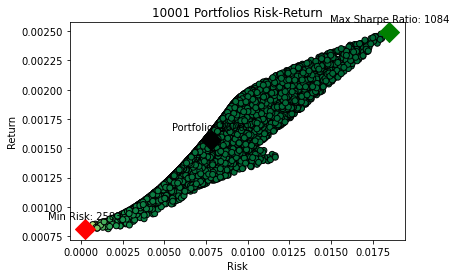

In [43]:
import matplotlib.pyplot as plt
        # find min Volatility & max sharpe values in the dataframe (df)
    
def plot_single_point(x,y,title,colour):
        plt.scatter(x=x, y=y, c=colour, marker='D', s=200)
        plt.annotate(title, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center        
        

min_risk = minrisk
plt.scatter(vola, epr,c=sr,cmap='RdYlGn', edgecolors='black')
x = maxsrprisk
y = maxsrpreturn
name = str(maxsrportfolio+1)   
plt.title(str(len(portafolio))+" Portfolios Risk-Return")
plt.xlabel("Risk")
plt.ylabel("Return")
plot_single_point(x,y,'Max Sharpe Ratio: '+name, 'green')
x = min_risk
y = epr[minriskportfolio]
name = str(minriskportfolio+1)
plot_single_point(x,y,'Min Risk: '+name, 'red')
x = vola[edportfolio-1]
y = epr[edportfolio-1]
name = str(edportfolio)
plot_single_point(x,y,'Portfolio: '+name, 'black')
